# Máquinas de Vetores de Suporte (SVM) 
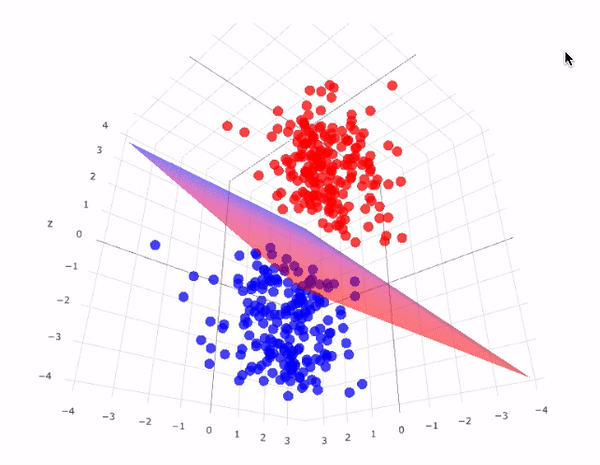
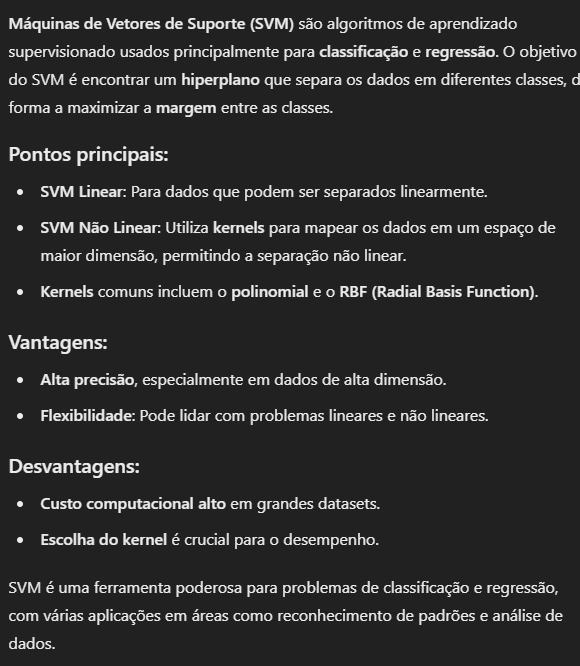

## Carregando e analisando dataset

In [38]:
from sklearn import datasets
dados = datasets.load_breast_cancer(as_frame=True)

In [39]:
dados.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [40]:
dados.frame.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [41]:
dados.frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [42]:
dados.data.shape

(569, 30)

## Trabalhando com SVM

In [44]:
from sklearn.model_selection import train_test_split

X = dados.data
y = dados.target

X_train, X_predict, y_train, y_predict = train_test_split(X, y, test_size=.3)

In [54]:
from sklearn import svm
from sklearn import metrics

kernels = ['linear', 'rbf', 'sigmoid']
gammas = [1, .01, .001, .0001]


for kernel in kernels:
    for gamma in gammas:

        modelo = svm.SVC(kernel=kernel, gamma=gamma)
        modelo.fit(X_train, y_train)
        predicao = modelo.predict(X_predict)
        print(f"Kernel:{kernel} Gamma:{gamma} Exatidão:{metrics.accuracy_score(y_predict, predicao)}")
        print(f"Kernel:{kernel} Gamma:{gamma} Previsão:{metrics.precision_score(y_predict, predicao)}")
        

Kernel:linear Gamma:1 Exatidão:0.935672514619883
Kernel:linear Gamma:1 Previsão:0.9509803921568627
Kernel:linear Gamma:0.01 Exatidão:0.935672514619883
Kernel:linear Gamma:0.01 Previsão:0.9509803921568627
Kernel:linear Gamma:0.001 Exatidão:0.935672514619883
Kernel:linear Gamma:0.001 Previsão:0.9509803921568627
Kernel:linear Gamma:0.0001 Exatidão:0.935672514619883
Kernel:linear Gamma:0.0001 Previsão:0.9509803921568627
Kernel:rbf Gamma:1 Exatidão:0.6023391812865497
Kernel:rbf Gamma:1 Previsão:0.6023391812865497
Kernel:rbf Gamma:0.01 Exatidão:0.6023391812865497
Kernel:rbf Gamma:0.01 Previsão:0.6023391812865497
Kernel:rbf Gamma:0.001 Exatidão:0.9064327485380117
Kernel:rbf Gamma:0.001 Previsão:0.9223300970873787
Kernel:rbf Gamma:0.0001 Exatidão:0.9005847953216374
Kernel:rbf Gamma:0.0001 Previsão:0.9056603773584906
Kernel:sigmoid Gamma:1 Exatidão:0.6023391812865497
Kernel:sigmoid Gamma:1 Previsão:0.6023391812865497
Kernel:sigmoid Gamma:0.01 Exatidão:0.6023391812865497
Kernel:sigmoid Gamma:0.0

In [62]:
modelo = svm.SVC(kernel='linear')
modelo.fit(X_train, y_train)
predicao = modelo.predict(X_predict)
print(f"Exatidão:{metrics.accuracy_score(y_predict, predicao)}")
print(f"Previsão:{metrics.precision_score(y_predict, predicao)}")


Exatidão:0.935672514619883
Previsão:0.9509803921568627


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_predict, predicao))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        68
           1       0.95      0.94      0.95       103

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [64]:
from sklearn.metrics import confusion_matrix
import pandas as pd

pd.DataFrame(confusion_matrix(y_predict, predicao))

,0,1
0,63,5
1,6,97
